# Fit Manager Rework
Kak W., 2018-09-28

## Objective:

 - Rework `FitManager` 
    - add double crystal ball
    - add draw function

## Import Samples

- path: `/data/users/kakw/Resonances/LepGamma_elg_newblind_2018_09_23_beta`
- apply blinding to strict signal region: 
    - MET>25 and
    - leading photon passing:
        - Pixel Veto, and
        - CSEV

### Sample Pre-selection
- Trigger: HLT_Ele27_eta2p1_WPTight_Gsf
- Overlap removal with dR<0.4, in the preference of muon over electron over photon over jets
- at least 1 photon object and only 1 electron object required
- no muons in sample
- cut-based working points
- photon: medium, pT>20  
- electron: medium, pT>10 (will move to tight?)
- muon: tight, pT> 25

### Signal region cuts (e channel)

 - photon pT > 50
 - inverse Z mass cut (Width=15?)
 - photon passing electron veto (Pixel Seed?)
 

In [1]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


In [ ]:
import SampleManager; reload(SampleManager);from SampleManager import SampleManager

In [2]:
 %run interactiveStackTree.py --baseDir  /data/users/kakw/Resonances/LepGamma_elg_newblind_2018_09_23_beta \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet

Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
DYJetsToLL_M-50                xsec : 5.77e+03 pb Nevent : 49144274 lumi : 8.52e+03 scale :     4.21
ZGTo2LG                        xsec :      118 pb Nevent : 9321494  lumi : 7.91e+04 scale :    0.454
TTJets_DiLept                  xsec :     85.7 pb Nevent : 6094476  lumi : 7.11e+04 scale :    0.505
TTJets_SingleLeptFromT         xsec :      179 pb Nevent : 11957043 lumi : 6.69e+04 scale :    0.537
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
TTGJets                        xsec :      3.7 pb Nevent : 1577833  lumi : 4.27e+05 scale :   0.0841
WWTo2L2Nu                      xsec :     12.2 pb Nevent : 1        lumi :   0.0821 scale : 4.37e+05
WGToLNuG-amcatnloFXFX          xsec :      822 pb Nevent : 3235156  lumi : 3.94e+03 scale :     9.12
WGToLNuG-madgraphMLM           xsec :      405 pb Nevent : 6103

In [3]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
base1 = 'ph_n==1 && el_n==1'
base1eta = base1 + ' && ph_IsEB[0]'
#a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
#b4 = '&& ph_hasPixSeed[0]==1'
passpix = '&& ph_hasPixSeed[0]==0'  #Pixel seed
failpix = '&& ph_hasPixSeed[0]==1'
passcsev = '&& ph_passEleVeto[0]==1' #CSEV
failcsev = '&& ph_passEleVeto[0]==0' 
ltmet = '&&met_pt<25'
gtmet = '&&met_pt>25'
phpt50 = "&&ph_pt[0]>50"
unblind = "ph_hasPixSeed[0]==1 || met_pt<25"
weight = "PUWeight*NLOWeight"

In [4]:
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptFit(1)
#samples.change_stack_order("GammaGamma","Wjets") # not working :/

In [5]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets","Zgamma"])

Activate sample Z+jets
Activate sample Zgamma


## Prepare fit sample

- e,g mass with barrel photons
- dominated by Z -> ee events with one electron misidentified
- 

In [ ]:
samples.Draw("m_lep_ph",base1eta+gtmet + passpix,(200,0,200),
             {"xlabel":"m(e,#gamma) " , "weight": weight,"logy":1 })

m_lep_ph : ph_n==1 && el_n==1 && ph_IsEB[0]&&met_pt>25&&ph_pt[0]>50&&ph_pt[0]<80
stack_sum 145243.605367


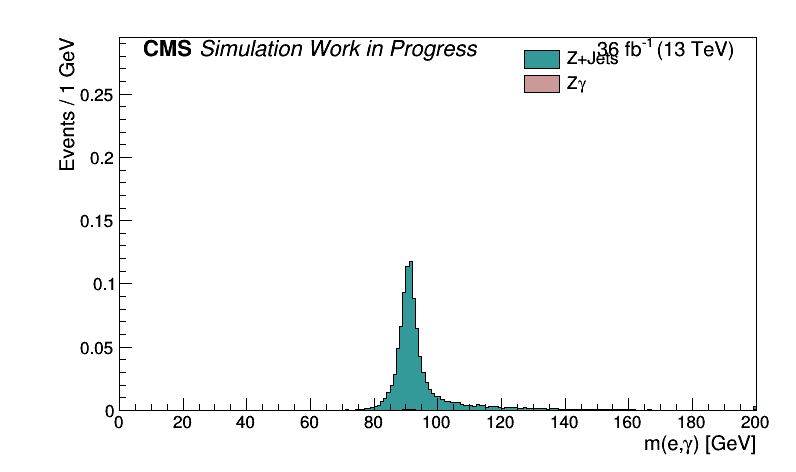

Info in <TCanvas::Print>: png file /tmp/tmpbrodEQ.png has been created


In [6]:
samples.Draw("m_lep_ph",base1eta+gtmet+"&&ph_pt[0]>50&&ph_pt[0]<80",(200,0,200),
             {"xlabel":"m(e,#gamma) " , "weight": weight,'normalize':1})

In [7]:
h1=samples.get_stack_pdf()
h1.Draw()
h2=samples.get_stack_pdf(method=2)
h2.Draw("same")
#h1.GetXaxis().SetRangeUser(20,160)
#h1.GetYaxis().SetRangeUser(0,0.15)
%jsroot
samples.curr_canvases["top"].Draw()

In [8]:
h1 = samples.get_samples(name='__AllStack__')[0].hist.Clone()
#h1.Scale(1./h1.Integral())

In [ ]:
cv = samples.Draw("m_lep_ph",base1eta+ltmet+"&&ph_pt[0]>100",(200,0,200),
             {"xlabel":"m(e,#gamma) " , "weight": weight,'normalize':1 })
h2 = samples.get_samples(name='__AllStack__')[0].hist.Clone()
h2.Scale(1./h2.Integral())

In [ ]:
h1.Draw()
h2.Draw("same")
h1.SetLineColor(2)
h1.SetLineWidth(2)
h2.SetLineWidth(2)
h2.SetLineColor(6)
h1.GetXaxis().SetRangeUser(20,160)
h1.GetYaxis().SetRangeUser(0,0.15)
samples.curr_canvases["top"]


In [ ]:
#samples.CompareSelections("m_lep_ph",[base1eta+ltmet+"&&ph_pt[0]>100",base1eta+ltmet+"&&ph_pt[0]>50&&ph_pt[0]<60"],
#                          ["Z+jets"]*2,(200,0,400), {"xlabel":"m(e,#gamma) " , "weight": weight,'normalize':1 ,'logy':1,
#                          "doratio":1,'rlabel':"red/black", 'colors' : [ROOT.kBlack, ROOT.kRed]})
#samples.curr_canvases['top'].cd();samples.samples[-2].hist.GetYaxis().UnZoom();ROOT.gPad.Modified();ROOT.gPad.Update();
#samples.curr_canvases["base"]

## Fitting

In [ ]:
x = ROOT.RooRealVar("x","x",85,195)
x2 = ROOT.RooRealVar("x","reco mass [GeV]",0,200) #plot range

In [ ]:
#import DrawConfig; reload(DrawConfig)
import FitManager; reload(FitManager);from FitManager import FitManager

In [ ]:
fm = FitManager("cb",h1)

In [ ]:
froo_cb = fm.setup_fit((85,195))

## Crystal Ball function

 - gaussian fit to resonance peak
 - with power-law tail (in high end for us)
 
    $f(x;\alpha,n,x,\sigma) = \begin{cases} \text{exp}\left(-\frac{(x-x_{0})^{2}}{2\sigma^{2}}\right)&\text{for  }x-x_{0}<\alpha\sigma \\ A\left(B-\frac{x-x_{0}}{\sigma}\right) ^{-n}&\text{for  }x-x_{0}\geq\alpha\sigma\end{cases}$
 
 - With A and B fixed so that the pdf is continuous and differentiable at juncture
 - A "double" crystal ball is the version with two power tails

## Crystal Ball: initiation

In [ ]:
c=fm.draw("Fit of Z reco mass with electron fakes",(1e-4,1),logy=1)

In [ ]:
c.Draw()

In [ ]:
froo_cb = fm.run_fit((85,155))

## Crystal Ball: Fit Result

In [ ]:
fm.draw(" ",(1e-4,1),logy=1,layout=(0.55,0.9,0.82));

In [ ]:
#fm.func_pdf.paramOn(fm.frame,RooFit.Layout(0.65)).Draw()

In [ ]:
fm.canvas.Draw()

In [ ]:
fm.fitresult.Print()

In [ ]:
fm.defs['cb_alpha'].getVal()

In [ ]:
fm.defs['cb_alpha'].getError()

## Crystal Ball: Fit Result in linear scale

In [ ]:
fm.canvas.SetLogy(0); fm.frame.SetMaximum(0.15);fm.canvas.Draw()

In [ ]:
fm.frame.chiSquare() # 70 is dof

## Double-sided Cystal Ball

For the generation of custom piece-wise function:

run in ROOT CINT interactive and edit `evaluate()`

```RooClassFactory::makePdf("DoubleCB","m,m0,sigma,alpha1,n1,alpha2,n2")``` 

### Compiling source
in pyROOT: `ROOT.gROOT.ProcessLineSync(".x DoubleCB.cxx+") `

In [9]:
import FitManager; reload(FitManager);from FitManager import FitManager

In [10]:
fm = FitManager("dcb",h1, xvardata = (40,200,"GeV"))

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(datahist): fit range of variable x expanded to nearest bin boundaries: [40,200] --> [40,200]


In [11]:
froo_dcb = fm.setup_fit((60,195))

DoubleCB::pdf(x[20,200],dcb_mass[91,86,96],dcb_sigma[5,0.5,100],dcb_alpha1[2,0.01,5],dcb_power1[2,0.01,20],dcb_alpha2[2,0.01,5],dcb_power2[2,0.01,5])
(DoubleCB) Name:  Title: 


Info in <TUnixSystem::ACLiC>: creating shared library /home/kakw/efake/WG_Analysis/Plotting/./DoubleCB_cxx.so


In [12]:
fm.addhist(h1)

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(datahist): fit range of variable x expanded to nearest bin boundaries: [20,200] --> [20,200]


In [13]:
fm.get_parameter_values()

{'dcb_alpha1': 2.0+/-0.01,
 'dcb_alpha2': 2.0+/-0.01,
 'dcb_mass': 91.0+/-0.1,
 'dcb_power1': 2.0+/-0.5,
 'dcb_power2': 2.0+/-0.01,
 'dcb_sigma': 5.0+/-0.01}

In [14]:
c=fm.draw(" ",(1,1e6),logy=1)
#fm.func_pdf.paramOn(fm.frame,RooFit.Layout(0.65,0.9,0.9)).Draw()

[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) p.d.f. curve is normalized using explicit choice of ranges 'myrange'
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[x|myrange]_Norm[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


### Before fitting

In [15]:
c.Draw()

In [16]:
froo_dcb = fm.run_fit((70,180))

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit' created with bounds [70,180]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_pdf_datahist) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'NormalizationRangeForfit' created with bounds [20,200]
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit_nll_pdf_datahist' created with bounds [70,180]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_pdf_datahist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 dcb_alpha

In [17]:
c=fm.draw(" ",(1,1e5),logy=1,paramlayout=(0.55,0.9,0.82),subplot="pull")

[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) only plotting range [70,180]
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) p.d.f. curve is normalized using explicit choice of ranges 'myrange'
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pdf_Int[x|myrange]_Norm[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


### After fitting

know bug in plot normalization
https://sft.its.cern.ch/jira/browse/ROOT-7485

meaning of chi sq in RooFit

https://root-forum.cern.ch/t/chi-square-in-roofit/31015/3

https://root-forum.cern.ch/t/fit-range-and-chisquare/20230

In [ ]:
#fm.func_pdf.paramOn(fm.frame,RooFit.Layout(0.65)).Draw()

In [18]:
#%jsroot off
c.Draw()

In [ ]:
#fm.draw(" ",(2e-5,1),logy=1,paramlayout=0,subplot="pull").Draw()

In [ ]:
fm.fitresult.Print()

In [ ]:
fm.get_parameters()

In [ ]:
fm.get_parameter_values()

In [ ]:
parmnames = FitManager.ParamDCB;

In [ ]:
parmvals = {name:[] for name in parmnames}

In [ ]:
parmvals.items()

In [ ]:
parmvals['dcb_alpha1'].append(1)

In [ ]:
from uncertainties import ufloat

In [ ]:
a = ufloat(1,2)

In [ ]:
a.s

In [ ]:
fm.wk.Print()

In [ ]:
fm.wk.obj("dcb_alpha1")

In [ ]:
fm.defs["dcb_alpha1"]

In [ ]:
fm.wk.obj("dcb_alpha1").getVal()

In [ ]:
fm.wk.obj("dcb_alpha1").getError()

In [ ]:
fm.frame.chiSquare(6)

In [ ]:
dof = fm.frame.chiSquare(7)/(fm.frame.chiSquare(7)-fm.frame.chiSquare(6));round(dof)

In [ ]:
fm.frame.chiSquare(109)/104

In [ ]:
ROOT.TMath.Prob(fm.frame.chiSquare(6)*104,104)

In [ ]:
fm.frame

In [ ]:
fm.defs["dcb_alpha2"].getVal()

In [ ]:
ROOT.RooArgSet(fm.xvarfit)

In [ ]:
pm = fm.func_pdf.getParameters(ROOT.RooArgSet(fm.xvarfit))

In [ ]:
pm.

In [ ]:
pm.printLatex()

$\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{lrl}
\verb+fit range+& [75,&195]\\ \hline
\verb+dcb_alpha1+  &   1.08&\pm 0.03\\
\verb+dcb_alpha2+  &   1.14&\pm 0.01\\
\verb+dcb_mass+  &   90.92&\pm 0.02\\
\verb+dcb_power1+  &   8&\pm 1\\
\verb+dcb_power2+  &   1.47&\pm 0.02\\
\verb+dcb_sigma+  &   2.40&\pm 0.03\\
\end{array}$

In [ ]:
pm.printLatex()

use latex array: https://github.com/mathjax/mathjax-docs/wiki/LaTeX-Tabular-environment

$\newcommand\T{\Rule{0pt}{1em}{.3em}}
\begin{array}{lc}
\verb+fit range+& [75,155]\\ 
\hline
\verb+dcb_alpha1+  &   1.10\pm 0.04\\
\verb+dcb_alpha2+  &   1.19\pm 0.02\\
\verb+dcb_mass+  &  90.89\pm 0.02\\
\verb+dcb_power1+  &   8\pm 2\\
\verb+dcb_power2+  &   1.32\pm 0.02\\
\verb+dcb_sigma+  &   2.42\pm 0.03\\
\end{array}$

In [ ]:
froo_dcb = fm.run_fit((75,195))

In [ ]:
%run MakeZFit.py \
--baseDirElG /data/users/kakw/Resonances/LepGamma_elg_newblind_2018_09_23_beta/ \
--outputDir ~/efake/WG_Analysis/Plotting/Plots/zfit

In [ ]:
ls

## Conclusion

- sucessfully fitted crystal ball and double crystal ball
- Functions incorporated into FitManager.py

documentation: http://hepcms-hn.umd.edu/~kakw/2018_09_28_FitManager_Rework.html

#   

#   

#   

#   

# BACKUP

#   




|          |  MET<25   |MET>25, inv Z cut  |
|----------|-----------|-----------|
|pass eVeto|A          |Signal     |
|fail eVeto|B          | D         |

In [ ]:
!bash /home/kakw/forjupyter/jupyterconvert.sh /home/kakw/public_html/ 2018_09_28_FitManager_Rework.ipynb

In [ ]:
display(Math(r"f(x;\alpha,n,x,\sigma) = \begin{cases}"
             r"\text{exp}\left(-\frac{(x-x_{0})^{2}}{2\sigma^{2}}\right)&\text{for  }x-x_{0}<\alpha\sigma \\"
             r"A\left(B-\frac{x-x_{0}}{\sigma}\right)&\text{for  }x-x_{0}\geq\alpha\sigma\end{cases}"))